<h1>Tabla de contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción-a-la-redes-neuronales" data-toc-modified-id="Introducción-a-la-redes-neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción a la redes neuronales</a></span><ul class="toc-item"><li><span><a href="#Ejemplo-paso-a-paso" data-toc-modified-id="Ejemplo-paso-a-paso-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ejemplo paso a paso</a></span></li><li><span><a href="#Ejemplo-con-Scikit-learn" data-toc-modified-id="Ejemplo-con-Scikit-learn-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ejemplo con Scikit-learn</a></span></li><li><span><a href="#Red-neuronal-para-clasificación-binaria" data-toc-modified-id="Red-neuronal-para-clasificación-binaria-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Red neuronal para clasificación binaria</a></span></li><li><span><a href="#Red-neuronal-para-clasificación-múltiple" data-toc-modified-id="Red-neuronal-para-clasificación-múltiple-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Red neuronal para clasificación múltiple</a></span></li></ul></li></ul></div>

# Introducción a la redes neuronales

## Ejemplo paso a paso

In [1]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target
X = X[:, [1,2,3]] # tomamos mean radius, mean texture y mean perimeter
y = y
# estandarizamos los datos
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

In [2]:
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=0.2, random_state=2)
#número de muestras de entrenamiento
m = X_ent.shape[0]

In [3]:
y_ent = y_ent[:,np.newaxis]
y_pru = y_pru[:,np.newaxis]

In [4]:
X_ent.shape, X_pru.shape, y_ent.shape, y_pru.shape

((455, 3), (114, 3), (455, 1), (114, 1))

In [5]:
def calcular_costo(a2, y):     
    costo= -1/m * (np.sum(np.multiply(np.log(a2), y) + np.multiply((1 - y), np.log(1 - a2))))
    return costo

In [6]:
def sigmoide(t):
    return 1/(1+np.exp(-t))

def derivada_sigmoide(p):
    return sigmoide(p) * sigmoide(1 - p)

def relu(Z):
    return np.maximum(0, Z)

def derivada_Relu(x):
     x[x<=0] = 0
     x[x>0] = 1
     return x

In [7]:
def predecir(x): 
    w1 = modelo["w1"]
    b1 = modelo["b1"]
    w2 = modelo["w2"]
    b2 = modelo["b2"]    
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1) 
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoide(z2)   
    p = np.round(a2)    
    return p

In [8]:
def exactitud(y, yhat):
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc    

In [9]:
def forward(X, w1, w2, b1, b2):  
    z1 = np.dot(X,w1) + b1 
    a1 = relu(z1) 
    z2 = np.dot(a1, w2) + b2 
    a2 = sigmoide(z2) 
      
    # cache guarda los datos que serán usados en backpropagation
    cache = {"z1": z1, 
             "a1": a1, 
             "z2": z2, 
             "a2": a2}       
    return a2, cache 

In [10]:
def backward(w1, b1, w2, b2, cache, alfa):    
    a1 = cache['a1'] 
    a2 = cache['a2'] 
    z1 = cache['z1'] 
    z2 = cache['z2'] 
         
    dz2 = (a2 - y_ent) * derivada_sigmoide(z2)
    dw2 = np.dot(a2.T ,dz2) 
    db2 = np.mean(dz2, axis = 0) 
  
    dz1 = np.dot(dz2, w2.T) * derivada_Relu(z1)
    dw1 = np.dot(X_ent.T, dz1) 
    db1 = np.mean(dz1, axis = 0) 
         
    w2 = w2 - alfa * dw2 / m
    b2 = b2 - alfa * db2 / m
    w1 = w1 - alfa * dw1 / m
    b1 = b1 - alfa * db1 / m 
                
    return w1, w2, b1, b2

In [13]:
def entrenar(X, y, alfa, num_iter):
    global modelo
    global errores
    errores = []
    unid_entrada = X.shape[1]
    unid_oculta = 10
    unid_salida = 1
    
    np.random.seed(1)    
    w1 = np.random.randn(unid_entrada, unid_oculta)  # pesos capa 1   
    b1 = np.random.randn(1, unid_oculta)  # sesgo capa 1    
    w2 = np.random.randn(unid_oculta, unid_salida)  # pesos capa 2    
    b2 = np.random.randn(1, unid_salida) # sesgo capa 2

    for i in range(0, num_iter):             
            a2, cache = forward(X, w1, w2, b1, b2)                
            costo = calcular_costo(a2, y)
            errores.append(costo)  
            w1, w2, b1, b2 = backward(w1, b1, w2, b2, cache, alfa)           
            # Imprimimos el costo cada 100 iteraciones
            if i % 100 == 0: 
                print ("Costo después de % i: % f" % (i, costo)) 

    modelo = {"w1": w1,"b1": b1, "w2": w2, "b2": b2} 

In [14]:
entrenar(X_ent, y_ent, alfa = 0.01, num_iter = 10000)

Costo después de  0:  0.729519
Costo después de  100:  0.611357
Costo después de  200:  0.529825
Costo después de  300:  0.483728
Costo después de  400:  0.455192
Costo después de  500:  0.435098
Costo después de  600:  0.419906
Costo después de  700:  0.407749
Costo después de  800:  0.397744
Costo después de  900:  0.389388
Costo después de  1000:  0.382151
Costo después de  1100:  0.375939
Costo después de  1200:  0.370500
Costo después de  1300:  0.365660
Costo después de  1400:  0.361336
Costo después de  1500:  0.357462
Costo después de  1600:  0.353948
Costo después de  1700:  0.350738
Costo después de  1800:  0.347805
Costo después de  1900:  0.345109
Costo después de  2000:  0.342608
Costo después de  2100:  0.340274
Costo después de  2200:  0.338059
Costo después de  2300:  0.335981
Costo después de  2400:  0.334049
Costo después de  2500:  0.332246
Costo después de  2600:  0.330540
Costo después de  2700:  0.328936
Costo después de  2800:  0.327425
Costo después de  2900:  0

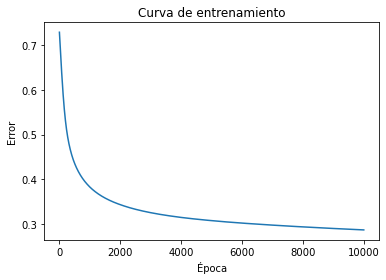

In [15]:
import matplotlib.pyplot as plt
plt.plot(errores)
plt.xlabel("Época")
plt.ylabel("Error")
plt.title("Curva de entrenamiento")
plt.show()

In [16]:
pred = predecir(X_pru)
pred

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],

In [17]:
pred_ent = predecir(X_ent)
pred_pru = predecir(X_pru)

print("Exactitud de entrenamiento: {}".format(exactitud(y_ent, pred_ent)))
print("Exaactitud de prueba: {}".format(exactitud(y_pru, pred_pru)))

Exactitud de entrenamiento: 88
Exaactitud de prueba: 86


## Ejemplo con Scikit-learn

In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=10000, # iteraciones
                    learning_rate_init=0.01, # tasa de aprendizaje
                    hidden_layer_sizes=10, # número de unidades en la capa oculta
                    activation='relu', # función de activación en la capa oculta
                    solver='sgd') # optimizador descenso del gradiente estocastico
clf.fit(X_ent, y_ent.ravel())
clf.predict_proba(X_pru[:1])
exac = clf.score(X_pru, y_pru)
print("Exactitud {:.2f}".format(exac))

Exactitud 0.89


## Red neuronal para clasificación binaria


In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
modelo = Sequential()
modelo.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
modelo.add(Dense(5, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [21]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01)

modelo.compile(loss='binary_crossentropy' , optimizer='sgd', 
               metrics=['accuracy'])

Using TensorFlow backend.


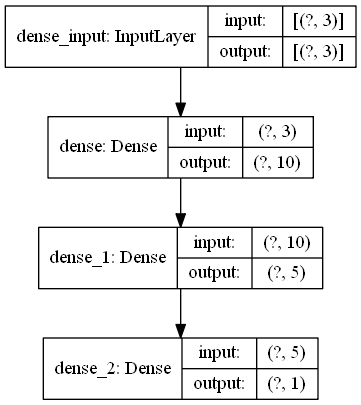

In [23]:
keras.utils.plot_model(modelo, show_shapes=True)

In [24]:
historial = modelo.fit(X_ent, y_ent ,epochs=1000 , batch_size=64, validation_split=0.2)

Epoch 1/1000
6/6 [==============================] - 0s 31ms/step - loss: 0.8256 - accuracy: 0.1703 - val_loss: 0.7934 - val_accuracy: 0.1868
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.8128 - accuracy: 0.1813 - val_loss: 0.7826 - val_accuracy: 0.2198
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.8007 - accuracy: 0.2033 - val_loss: 0.7726 - val_accuracy: 0.2308
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.7894 - accuracy: 0.2143 - val_loss: 0.7628 - val_accuracy: 0.2308
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.7784 - accuracy: 0.2280 - val_loss: 0.7536 - val_accuracy: 0.2527
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.7678 - accuracy: 0.2418 - val_loss: 0.7441 - val_accuracy: 0.2527
Epoch 7/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.7574 - accuracy: 0.2582 - val_loss: 0.7351 - val_accuracy: 0.2747
Epoch 8/1000
6/6 [=

6/6 [==============================] - 0s 5ms/step - loss: 0.5495 - accuracy: 0.8819 - val_loss: 0.5448 - val_accuracy: 0.9011
Epoch 60/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5455 - accuracy: 0.8791 - val_loss: 0.5410 - val_accuracy: 0.9011
Epoch 61/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5413 - accuracy: 0.8791 - val_loss: 0.5372 - val_accuracy: 0.9011
Epoch 62/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.5370 - accuracy: 0.8764 - val_loss: 0.5334 - val_accuracy: 0.9011
Epoch 63/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.8764 - val_loss: 0.5294 - val_accuracy: 0.9121
Epoch 64/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.8764 - val_loss: 0.5254 - val_accuracy: 0.9121
Epoch 65/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5239 - accuracy: 0.8764 - val_loss: 0.5212 - val_accuracy: 0.9121
Epoch 66/1000
6/6 [========

6/6 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.9066 - val_loss: 0.3250 - val_accuracy: 0.9121
Epoch 118/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3153 - accuracy: 0.9066 - val_loss: 0.3226 - val_accuracy: 0.9121
Epoch 119/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3130 - accuracy: 0.9066 - val_loss: 0.3202 - val_accuracy: 0.9121
Epoch 120/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3105 - accuracy: 0.9093 - val_loss: 0.3179 - val_accuracy: 0.9121
Epoch 121/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.3083 - accuracy: 0.9093 - val_loss: 0.3157 - val_accuracy: 0.9121
Epoch 122/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3059 - accuracy: 0.9093 - val_loss: 0.3135 - val_accuracy: 0.9121
Epoch 123/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.3037 - accuracy: 0.9093 - val_loss: 0.3114 - val_accuracy: 0.9121
Epoch 124/1000
6/6 [=

Epoch 175/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2456 - accuracy: 0.9038 - val_loss: 0.2548 - val_accuracy: 0.9121
Epoch 176/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2451 - accuracy: 0.9038 - val_loss: 0.2543 - val_accuracy: 0.9121
Epoch 177/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2447 - accuracy: 0.9038 - val_loss: 0.2538 - val_accuracy: 0.9121
Epoch 178/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2443 - accuracy: 0.9038 - val_loss: 0.2534 - val_accuracy: 0.9121
Epoch 179/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2438 - accuracy: 0.9038 - val_loss: 0.2529 - val_accuracy: 0.9121
Epoch 180/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2433 - accuracy: 0.9038 - val_loss: 0.2525 - val_accuracy: 0.9121
Epoch 181/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.9038 - val_loss: 0.2521 - val_accuracy: 0.9121
Epoch 

Epoch 233/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2310 - accuracy: 0.9038 - val_loss: 0.2392 - val_accuracy: 0.9121
Epoch 234/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2308 - accuracy: 0.9038 - val_loss: 0.2391 - val_accuracy: 0.9121
Epoch 235/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2307 - accuracy: 0.9038 - val_loss: 0.2389 - val_accuracy: 0.9121
Epoch 236/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2306 - accuracy: 0.9038 - val_loss: 0.2388 - val_accuracy: 0.9121
Epoch 237/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2305 - accuracy: 0.9066 - val_loss: 0.2387 - val_accuracy: 0.9121
Epoch 238/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2305 - accuracy: 0.9038 - val_loss: 0.2386 - val_accuracy: 0.9121
Epoch 239/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2303 - accuracy: 0.9066 - val_loss: 0.2384 - val_accuracy: 0.9121
Epoch 

6/6 [==============================] - 0s 8ms/step - loss: 0.2270 - accuracy: 0.9093 - val_loss: 0.2341 - val_accuracy: 0.9121
Epoch 291/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.9066 - val_loss: 0.2340 - val_accuracy: 0.9121
Epoch 292/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2269 - accuracy: 0.9093 - val_loss: 0.2340 - val_accuracy: 0.9121
Epoch 293/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2270 - accuracy: 0.9093 - val_loss: 0.2339 - val_accuracy: 0.9121
Epoch 294/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9093 - val_loss: 0.2339 - val_accuracy: 0.9121
Epoch 295/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9093 - val_loss: 0.2338 - val_accuracy: 0.9121
Epoch 296/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2268 - accuracy: 0.9093 - val_loss: 0.2337 - val_accuracy: 0.9121
Epoch 297/1000
6/6 [=

Epoch 348/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.9093 - val_loss: 0.2313 - val_accuracy: 0.9121
Epoch 349/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.9093 - val_loss: 0.2313 - val_accuracy: 0.9121
Epoch 350/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2252 - accuracy: 0.9093 - val_loss: 0.2312 - val_accuracy: 0.9121
Epoch 351/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9093 - val_loss: 0.2312 - val_accuracy: 0.9121
Epoch 352/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9093 - val_loss: 0.2312 - val_accuracy: 0.9121
Epoch 353/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2251 - accuracy: 0.9093 - val_loss: 0.2312 - val_accuracy: 0.9121
Epoch 354/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2250 - accuracy: 0.9093 - val_loss: 0.2312 - val_accuracy: 0.9121
Epoch 

Epoch 406/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2299 - val_accuracy: 0.9121
Epoch 407/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2299 - val_accuracy: 0.9121
Epoch 408/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2298 - val_accuracy: 0.9121
Epoch 409/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2298 - val_accuracy: 0.9121
Epoch 410/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2239 - accuracy: 0.9093 - val_loss: 0.2297 - val_accuracy: 0.9121
Epoch 411/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.9093 - val_loss: 0.2298 - val_accuracy: 0.9121
Epoch 412/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.9093 - val_loss: 0.2298 - val_accuracy: 0.9121
Epoch 

Epoch 464/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2227 - accuracy: 0.9121 - val_loss: 0.2286 - val_accuracy: 0.9121
Epoch 465/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2227 - accuracy: 0.9121 - val_loss: 0.2286 - val_accuracy: 0.9121
Epoch 466/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2227 - accuracy: 0.9121 - val_loss: 0.2286 - val_accuracy: 0.9121
Epoch 467/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2227 - accuracy: 0.9121 - val_loss: 0.2286 - val_accuracy: 0.9121
Epoch 468/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2228 - accuracy: 0.9121 - val_loss: 0.2285 - val_accuracy: 0.9121
Epoch 469/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.9121 - val_loss: 0.2285 - val_accuracy: 0.9121
Epoch 470/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2226 - accuracy: 0.9121 - val_loss: 0.2285 - val_accuracy: 0.9121
Epoch 

Epoch 522/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2275 - val_accuracy: 0.9121
Epoch 523/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2274 - val_accuracy: 0.9121
Epoch 524/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2274 - val_accuracy: 0.9121
Epoch 525/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2273 - val_accuracy: 0.9121
Epoch 526/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2273 - val_accuracy: 0.9121
Epoch 527/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2273 - val_accuracy: 0.9121
Epoch 528/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2218 - accuracy: 0.9121 - val_loss: 0.2272 - val_accuracy: 0.9121
Epoch 

Epoch 580/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.9121 - val_loss: 0.2262 - val_accuracy: 0.9121
Epoch 581/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9121 - val_loss: 0.2262 - val_accuracy: 0.9121
Epoch 582/1000
6/6 [==============================] - ETA: 0s - loss: 0.2805 - accuracy: 0.90 - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9121 - val_loss: 0.2262 - val_accuracy: 0.9121
Epoch 583/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2206 - accuracy: 0.9121 - val_loss: 0.2262 - val_accuracy: 0.9121
Epoch 584/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9121 - val_loss: 0.2261 - val_accuracy: 0.9121
Epoch 585/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2206 - accuracy: 0.9121 - val_loss: 0.2261 - val_accuracy: 0.9121
Epoch 586/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2206 - accuracy: 0.9121 - val_

6/6 [==============================] - 0s 7ms/step - loss: 0.2198 - accuracy: 0.9121 - val_loss: 0.2252 - val_accuracy: 0.9121
Epoch 638/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2198 - accuracy: 0.9093 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 639/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.9121 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 640/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2197 - accuracy: 0.9093 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 641/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.9121 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 642/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2197 - accuracy: 0.9093 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 643/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2198 - accuracy: 0.9121 - val_loss: 0.2252 - val_accuracy: 0.9121
Epoch 644/1000
6/6 [=

Epoch 695/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.9121 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 696/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2189 - accuracy: 0.9121 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 697/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2190 - accuracy: 0.9121 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 698/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2189 - accuracy: 0.9121 - val_loss: 0.2247 - val_accuracy: 0.9121
Epoch 699/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2189 - accuracy: 0.9121 - val_loss: 0.2247 - val_accuracy: 0.9121
Epoch 700/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2190 - accuracy: 0.9121 - val_loss: 0.2247 - val_accuracy: 0.9121
Epoch 701/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2189 - accuracy: 0.9121 - val_loss: 0.2247 - val_accuracy: 0.9121
Epoch 

Epoch 753/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2182 - accuracy: 0.9121 - val_loss: 0.2244 - val_accuracy: 0.9121
Epoch 754/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2181 - accuracy: 0.9121 - val_loss: 0.2244 - val_accuracy: 0.9121
Epoch 755/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2181 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 756/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2182 - accuracy: 0.9121 - val_loss: 0.2244 - val_accuracy: 0.9121
Epoch 757/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.9121 - val_loss: 0.2244 - val_accuracy: 0.9121
Epoch 758/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2183 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 759/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2180 - accuracy: 0.9121 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 

Epoch 811/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 812/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 813/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 814/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 815/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 816/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 817/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2174 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 

Epoch 869/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 870/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 871/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2168 - accuracy: 0.9093 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 872/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 873/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2167 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 874/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 0.2248 - val_accuracy: 0.9121
Epoch 875/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2167 - accuracy: 0.9093 - val_loss: 0.2248 - val_accuracy: 0.9121
Epoch 

Epoch 927/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 928/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2161 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 929/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2161 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 930/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2161 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 931/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2161 - accuracy: 0.9093 - val_loss: 0.2246 - val_accuracy: 0.9121
Epoch 932/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2160 - accuracy: 0.9093 - val_loss: 0.2245 - val_accuracy: 0.9121
Epoch 933/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2162 - accuracy: 0.9093 - val_loss: 0.2244 - val_accuracy: 0.9121
Epoch 

Epoch 985/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 986/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.2156 - accuracy: 0.9066 - val_loss: 0.2250 - val_accuracy: 0.9121
Epoch 987/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 988/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.2155 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 989/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2157 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 990/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2156 - accuracy: 0.9066 - val_loss: 0.2249 - val_accuracy: 0.9121
Epoch 991/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.2155 - accuracy: 0.9066 - val_loss: 0.2248 - val_accuracy: 0.9121
Epoch 

In [25]:
perdida, exactitud = modelo.evaluate(X_pru, y_pru)
print("La exactitud es: {:.2f}".format(exactitud))

4/4 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8860
La exactitud es: 0.89


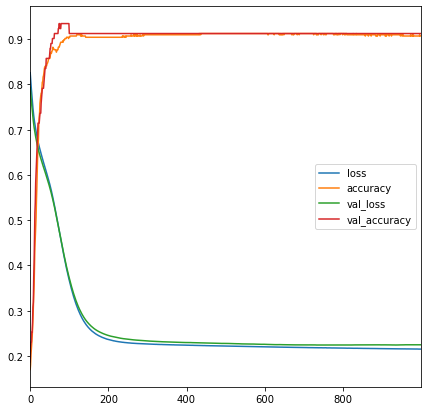

In [26]:
import pandas as pd
pd.DataFrame(historial.history).plot(figsize=(7,7))

## Red neuronal para clasificación múltiple

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [28]:
(X_ent, y_ent), (X_pru, y_pru) = fashion_mnist.load_data()

In [29]:
print("Forma X entrenamiento:",str(X_ent.shape))
print("Forma X prueba:",str(X_pru.shape))
print("Forma y entrenamiento",str(y_ent.shape))
print("Forma y prueba",str(y_pru.shape))

Forma X entrenamiento: (60000, 28, 28)
Forma X prueba: (10000, 28, 28)
Forma y entrenamiento (60000,)
Forma y prueba (10000,)


(-0.5, 27.5, 27.5, -0.5)

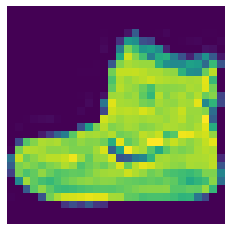

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X_ent[0])
plt.axis('off')

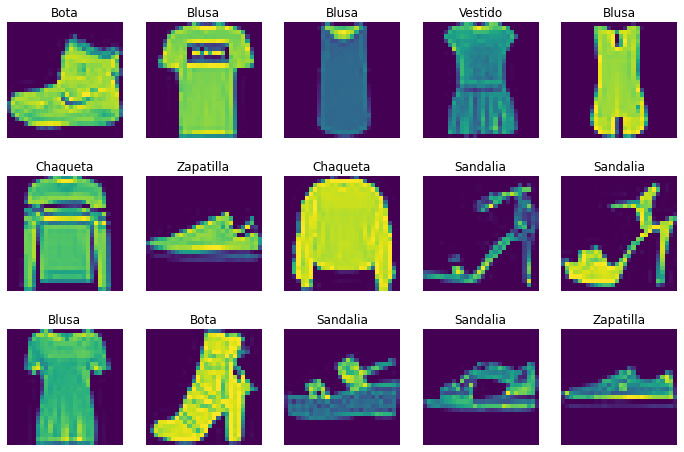

In [31]:
# creamos una lista con los nombres de las etiquetas
columnas = ["Blusa" , "Pantalón", "Chaqueta", "Vestido","Saco","Sandalia", 
            "Sueter","Zapatilla","Bolso","Bota"]
plt.figure(figsize=(12,8))
for i in range(15):
    plt.subplot(3,5,i + 1)
    plt.imshow(X_ent[i])
    plt.title(columnas[y_ent[i]])                    
    plt.axis('off')
plt.show()

In [32]:
# preprocesado
X_ent = X_ent.astype('float32')
X_pru = X_pru.astype('float32')
X_ent = X_ent / 255
X_pru = X_pru / 255

from keras.utils import to_categorical
y_ent = to_categorical(y_ent , num_classes=10)
y_pru = to_categorical(y_pru , num_classes=10)

In [33]:
print(y_ent[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [34]:
# crear el modelo 
modelo = keras.Sequential()
modelo.add(keras.layers.Flatten(input_shape=(28,28)))
modelo.add(keras.layers.Dense(10, activation='relu'))
modelo.add(keras.layers.Dense(10, activation='softmax'))

In [35]:
print(modelo.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
#configurar el modelo
modelo.compile(loss='categorical_crossentropy' , optimizer='adam', 
               metrics=['accuracy'])

In [37]:
# entremos
modelo.fit(X_ent, y_ent , epochs=10 , verbose=1)

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.77 - 3s 1ms/step - loss: 0.6878 - accuracy: 0.7710
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4617 - accuracy: 0.8402
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4285 - accuracy: 0.8497
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4105 - accuracy: 0.8547
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4005 - accuracy: 0.8587
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3920 - accuracy: 0.8602
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3822 - accuracy: 0.8642
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3772 - accuracy: 0.8651
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3713 - accuracy: 0.8670
Epoch 10/10
1875/1875 [=================

In [13]:
# evaluamos
loss, exac = modelo.evaluate(X_pru, y_pru)
print("La exactitud es: {:.2f}".format(exac))

313/313 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8374
La exactitud es: 0.84


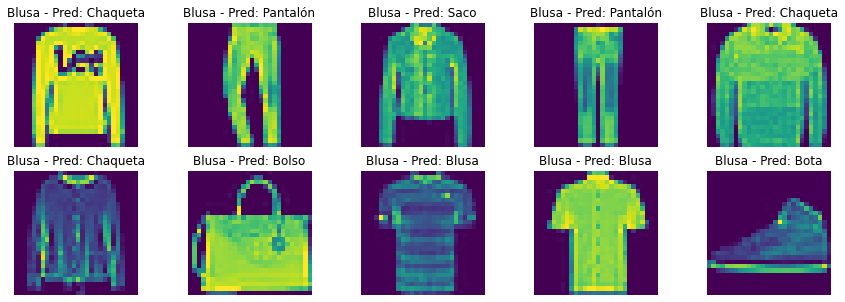

In [32]:
from keras.preprocessing import image
import numpy as np

plt.figure(figsize=(15,5))
x=0
for i in [1, 5, 10, 15, 20, 25, 30, 35, 40, 45]:
    plt.subplot(2,5,x + 1)
    img = X_pru[i]      
    plt.imshow(img)
    img = (np.expand_dims(img,0))
    res = modelo.predict(img) 
    plt.title(columnas[np.argmax(y_pru[i])] + " - Pred: " + columnas[np.argmax(res)])  
    plt.axis('off')
    x=x+1
plt.show()                

In [124]:
columnas[np.argmax(y_pru[10])]

'corbata'

In [125]:
y_pru[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)